In [1]:
#import libaries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import csv files
df=pd.read_csv("athlete_events.csv")
df2=pd.read_csv("noc_regions (1).csv")

In [3]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
df2.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [5]:
#join the dataframe new for how and combine for on
df3=df.merge(df2,how="left",on="NOC")
df3.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [12]:
# to ceheck the shape of the data
df3.shape

(271116, 17)

In [6]:
# column name consistent or change the column name(label)
df3.rename(columns={"region":"Region","notes":"Notes"},inplace=True)

In [15]:
df3.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN


In [7]:
# to check the information of the data 
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271116 entries, 0 to 271115
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
 15  Region  270746 non-null  object 
 16  Notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 24.8+ MB


In [8]:
# for describe the data
# this function takes only numerical columns
df3.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [9]:
#to check the null values
df3.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [10]:
# India details
df3.query('Team=="India"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
505,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NaN,India,NaN
506,281,S. Abdul Hamid,M,NaN,NaN,NaN,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NaN,India,NaN
895,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NaN,India,NaN
896,512,Shiny Kurisingal Abraham-Wilson,F,19.0,167.0,53.0,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NaN,India,NaN
897,512,Shiny Kurisingal Abraham-Wilson,F,23.0,167.0,53.0,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NaN,India,NaN


In [11]:
# India details
df3.query('Team=="Japan"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
625,362,Isao Ko Abe,M,24.0,177.0,75.0,Japan,JPN,1936 Summer,1936,Summer,Berlin,Athletics,Athletics Men's Hammer Throw,NaN,Japan,NaN
629,363,Kazumi Abe,M,28.0,178.0,67.0,Japan,JPN,1976 Winter,1976,Winter,Innsbruck,Bobsleigh,Bobsleigh Men's Four,NaN,Japan,NaN
630,364,Kazuo Abe,M,25.0,166.0,69.0,Japan,JPN,1960 Summer,1960,Summer,Roma,Wrestling,"Wrestling Men's Lightweight, Freestyle",NaN,Japan,NaN
631,365,Kinya Abe,M,23.0,168.0,68.0,Japan,JPN,1992 Summer,1992,Summer,Barcelona,Fencing,"Fencing Men's Foil, Individual",NaN,Japan,NaN
632,366,Kiyoshi Abe,M,25.0,167.0,62.0,Japan,JPN,1972 Summer,1972,Summer,Munich,Wrestling,"Wrestling Men's Featherweight, Freestyle",NaN,Japan,NaN


In [137]:
# Top 10 countries participation 
top_10_countries=df3.Team.value_counts().sort_values(ascending=False).head(10)
top_10_countries

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

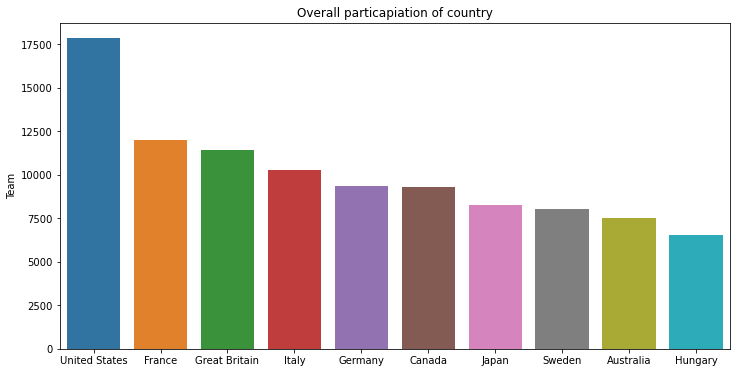

In [13]:
#plot the top_10_countries
plt.figure(figsize=(12,6))
#plt .xticks(rotation=20)
plt.title("Overall particapiation of country")
sns.barplot(x=top_10_countries.index,y=top_10_countries)

(array([1.4000e+01, 2.2600e+02, 3.0400e+03, 9.2280e+03, 1.9795e+04,
        3.4422e+04, 4.2689e+04, 4.1427e+04, 3.3700e+04, 2.5506e+04,
        1.7047e+04, 1.1046e+04, 7.1180e+03, 4.4560e+03, 3.0170e+03,
        2.1630e+03, 1.6590e+03, 1.2670e+03, 8.3700e+02, 7.6900e+02,
        4.7700e+02, 4.4400e+02, 2.6600e+02, 2.0000e+02, 1.7100e+02,
        1.5600e+02, 1.1800e+02, 1.1400e+02, 5.6000e+01, 8.5000e+01,
        6.1000e+01, 3.2000e+01, 1.6000e+01, 9.0000e+00]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
        78]),
 <a list of 34 Patch objects>)

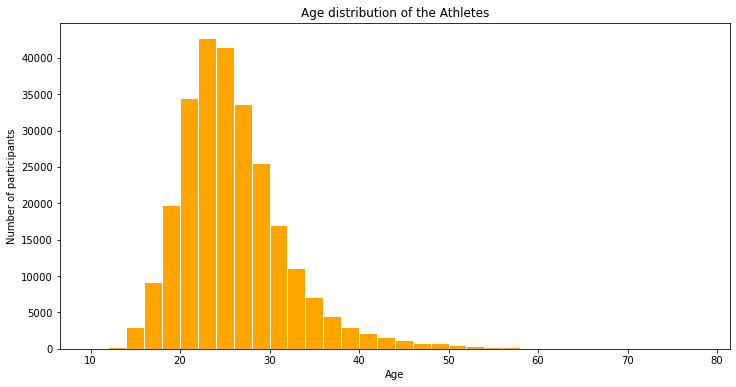

In [14]:
# Age distribution of the participation
plt.figure(figsize=(12,6))
plt.title("Age distribution of the Athletes")
plt.xlabel("Age")
plt.ylabel("Number of participants")
plt.hist(df3.Age,bins=np.arange(10,80,2),color="orange",edgecolor="white")
#it means most of the participation age group is 20 to 30

In [15]:
# want to know winter season sport games in tokio
Winter_sports=df3[df3.Season=="Winter"].Sport.unique()
Winter_sports

array(['Speed Skating', 'Cross Country Skiing', 'Ice Hockey', 'Biathlon',
       'Alpine Skiing', 'Luge', 'Bobsleigh', 'Figure Skating',
       'Nordic Combined', 'Freestyle Skiing', 'Ski Jumping', 'Curling',
       'Snowboarding', 'Short Track Speed Skating', 'Skeleton',
       'Military Ski Patrol', 'Alpinism'], dtype=object)

In [16]:
# for count winter sports
Winter_sports=df3[df3.Season=="Winter"].Sport.value_counts()
Winter_sports

Cross Country Skiing         9133
Alpine Skiing                8829
Speed Skating                5613
Ice Hockey                   5456
Biathlon                     4893
Bobsleigh                    3058
Ski Jumping                  2401
Figure Skating               2244
Short Track Speed Skating    1534
Luge                         1479
Nordic Combined              1344
Freestyle Skiing              937
Snowboarding                  936
Curling                       463
Skeleton                      199
Military Ski Patrol            24
Alpinism                       21
Name: Sport, dtype: int64

In [17]:
# want to know summer season sport games in tokio
summer_sports=df3[df3.Season=="Summer"].Sport.unique()
summer_sports

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [18]:
# for counts winter season game 
summer_sports=df3[df3.Season=="Summer"].Sport.value_counts()
summer_sports

Athletics                38624
Gymnastics               26707
Swimming                 23195
Shooting                 11448
Cycling                  10859
Fencing                  10735
Rowing                   10595
Wrestling                 7154
Football                  6745
Sailing                   6586
Equestrianism             6344
Canoeing                  6171
Boxing                    6047
Hockey                    5417
Basketball                4536
Weightlifting             3937
Water Polo                3846
Judo                      3801
Handball                  3665
Art Competitions          3578
Volleyball                3404
Tennis                    2862
Diving                    2842
Archery                   2334
Table Tennis              1955
Modern Pentathlon         1677
Badminton                 1457
Synchronized Swimming      909
Baseball                   894
Rhythmic Gymnastics        658
Taekwondo                  606
Beach Volleyball           564
Triathlo

In [144]:
# Gender counts in olympic
gender_counts=df3.Sex.value_counts()
gender_counts

M    196594
F     74522
Name: Sex, dtype: int64

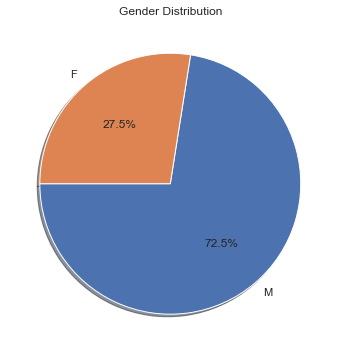

In [145]:
# pie plot for male and female
# autopct function use for to show the value in % on pie chart
plt.figure(figsize=(12,6))
plt.title("Gender Distribution")
plt.pie(gender_counts,labels=gender_counts.index,autopct='%1.1f%%',startangle=180,shadow=True);

In [70]:
# total medal
df3['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [39]:
#Total number of female athletes  in each olympics
# here i'm trying to filter my data only for the female athlets for summer olympic
# printing the participations based on each year 
female_participation=df3[(df3.Sex=="F")&(df3.Season=="Summer")][['Sex','Year']]
female_participation=female_participation.groupby('Year').count().reset_index()
female_participation.tail()

,Year,Sex
23,2000,5431
24,2004,5546
25,2008,5816
26,2012,5815
27,2016,6223


In [44]:
women_olympics=df3[(df3.Sex=='F')&(df3.Season=='Summer')]

Text(0.5, 1.0, 'Women participation')

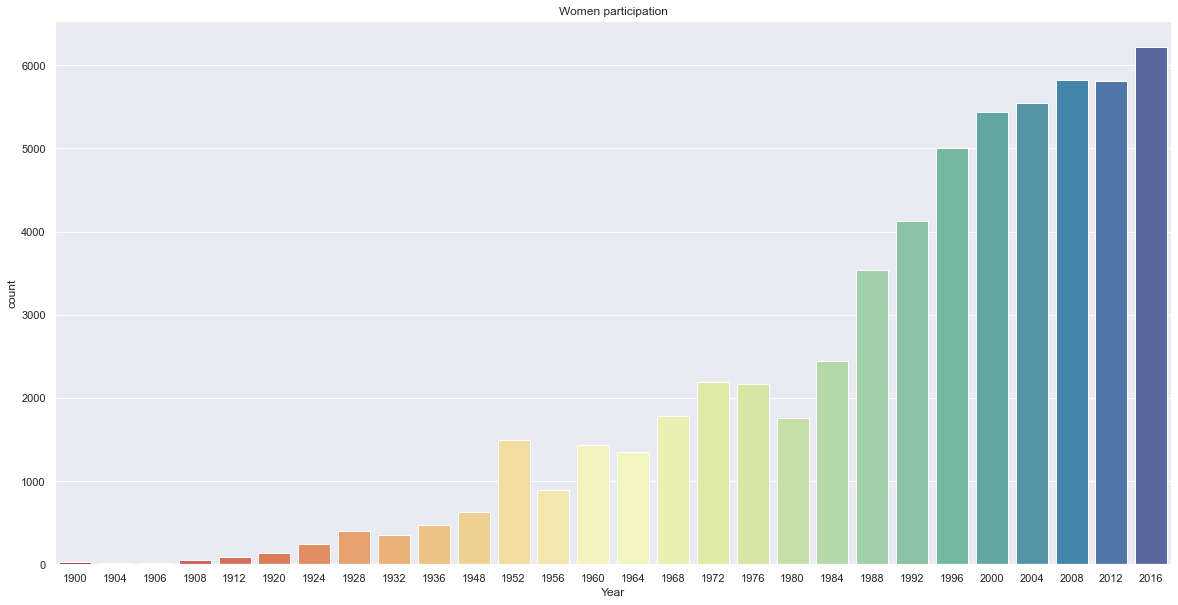

In [71]:
# plot the women participation on graph
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.countplot(x='Year',data=women_olympics,palette='Spectral')
plt.title('Women participation')

Text(0.5, 1.0, 'Plot of Female Athletes over %time')

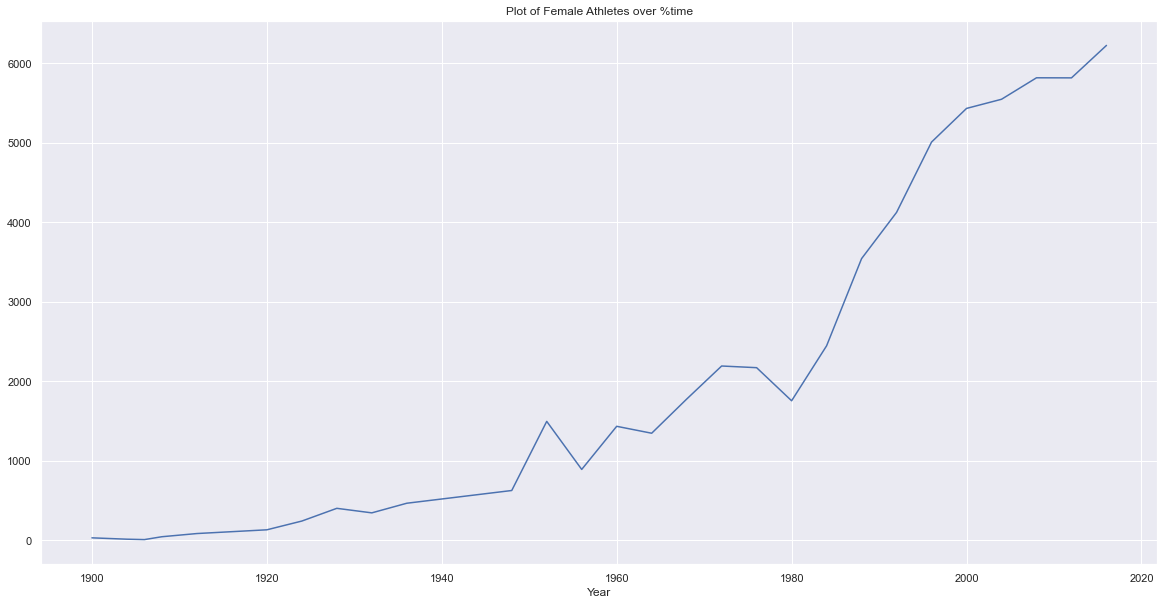

In [76]:
# plot the women participation on graph as trend 
part=women_olympics.groupby('Year')['Sex'].value_counts()
plt.figure(figsize=(20,10))
part.loc[:,"F"].plot()
plt.title('Plot of Female Athletes over %time')

In [96]:
# Gold medal athletes
gold_medals=df3[df3.Medal=='Gold']
gold_medals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [97]:
# take only the value is different from NaN
gold_medals=gold_medals[np.isfinite(gold_medals['Age'])]

In [98]:
# want to see gold medaliest whose age over 60 year
gold_medals['ID'][gold_medals['Age']>60].count()

6

In [103]:
# in which sport medalist earn gold whose age is over 60
sporting_event=gold_medals['Sport'][gold_medals['Age']>60]
sporting_event

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

In [104]:
# in which Year medalist earn gold whose age is over 60
sporting_year=gold_medals['Year'][gold_medals['Age']>60]
sporting_year

104003    1928
105199    1904
190952    1904
226374    1904
233390    1912
261102    1904
Name: Year, dtype: int64

In [105]:
# in which Name medalist earn gold whose age is over 60
sporting_Name=gold_medals['Name'][gold_medals['Age']>60]
sporting_Name

104003                       Isaac Lazarus Israls
105199                            Charles Jacobus
190952    Lida Peyton "Eliza" Pollock (McMillen-)
226374               Galen Carter "G. C." Spencer
233390                          Oscar Gomer Swahn
261102                    Robert W. Williams, Jr.
Name: Name, dtype: object

Text(0.5, 1.0, 'Gold Medal for Athletes over 60 Year')

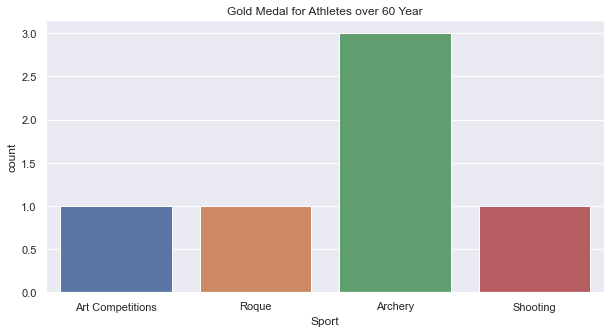

In [107]:
# plot the sporting events
plt.figure(figsize=(10,5))
plt.tight_layout()
sns.countplot(sporting_event)
plt.title("Gold Medal for Athletes over 60 Year")

In [109]:
# Gold Medal for each country
gold_medals.Region.value_counts().reset_index(name='Medal').head(5)

,index,Medal
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567


Text(0.5, 1.0, 'Gold Medal per country')

<Figure size 2880x42192 with 0 Axes>

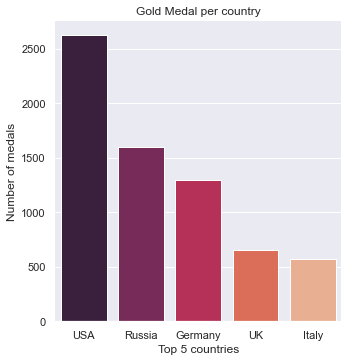

In [134]:
TotalGoldmedal=gold_medals.Region.value_counts().reset_index(name='Medal').head(5)
g=sns.catplot(x="index",y="Medal",data=TotalGoldmedal,
              height=5,kind="bar",palette="rocket")
g.despine(left=True)
g.set_xlabels('Top 5 countries')
g.set_ylabels("Number of medals")
plt.title('Gold Medal per country')

In [122]:
# Rio Olympic(2016)
max_year=df3.Year.max()
print(max_year)

team_names=df3[(df3.Year==max_year)&(df3.Medal=="Gold")].Team

team_names.value_counts().head(10)

2016


United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

Text(0.5, 0, 'Countries wise medal for the year 2016')

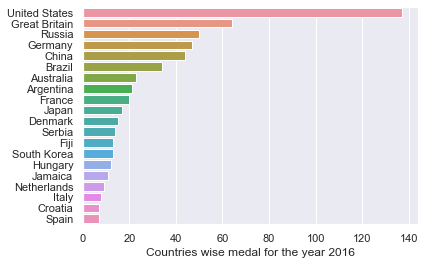

In [124]:
sns.barplot(x=team_names.value_counts().head(20),y=team_names.value_counts().head(20).index)
plt.ylabel(None);
plt.xlabel("Countries wise medal for the year 2016")


In [127]:
# for not include the null values in Height and Weight colum
not_null_medals=df3[(df3["Height"].notnull())&(df3['Weight'].notnull())]

Text(0.5, 1.0, 'Height vs weight of Olympic Medalists')

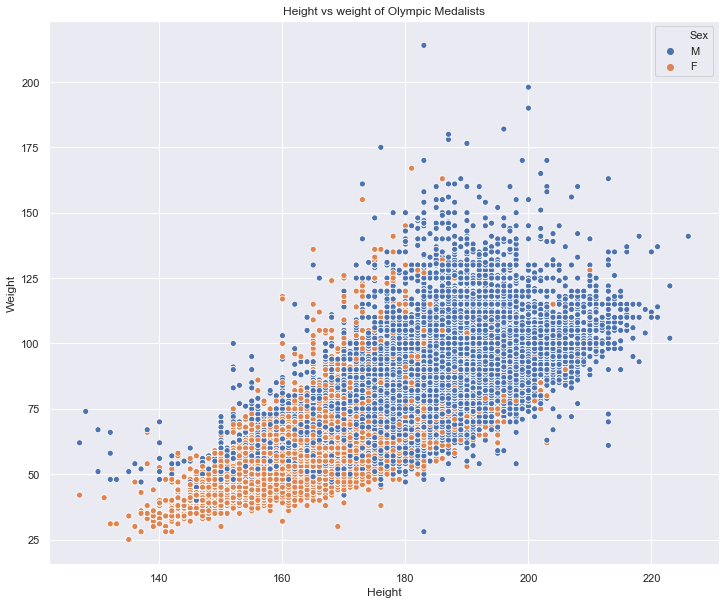

In [128]:
plt.figure(figsize=(12,10))
axis=sns.scatterplot(x="Height",y="Weight",data=not_null_medals,hue='Sex')
plt.title("Height vs weight of Olympic Medalists")

In [75]:
df3.head(2)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
